
Informações do dataset:
- Total de registros: 768
- Proporção de casos positivos: 34.90%

Estatísticas descritivas:
                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  


<Figure size 1200x800 with 0 Axes>

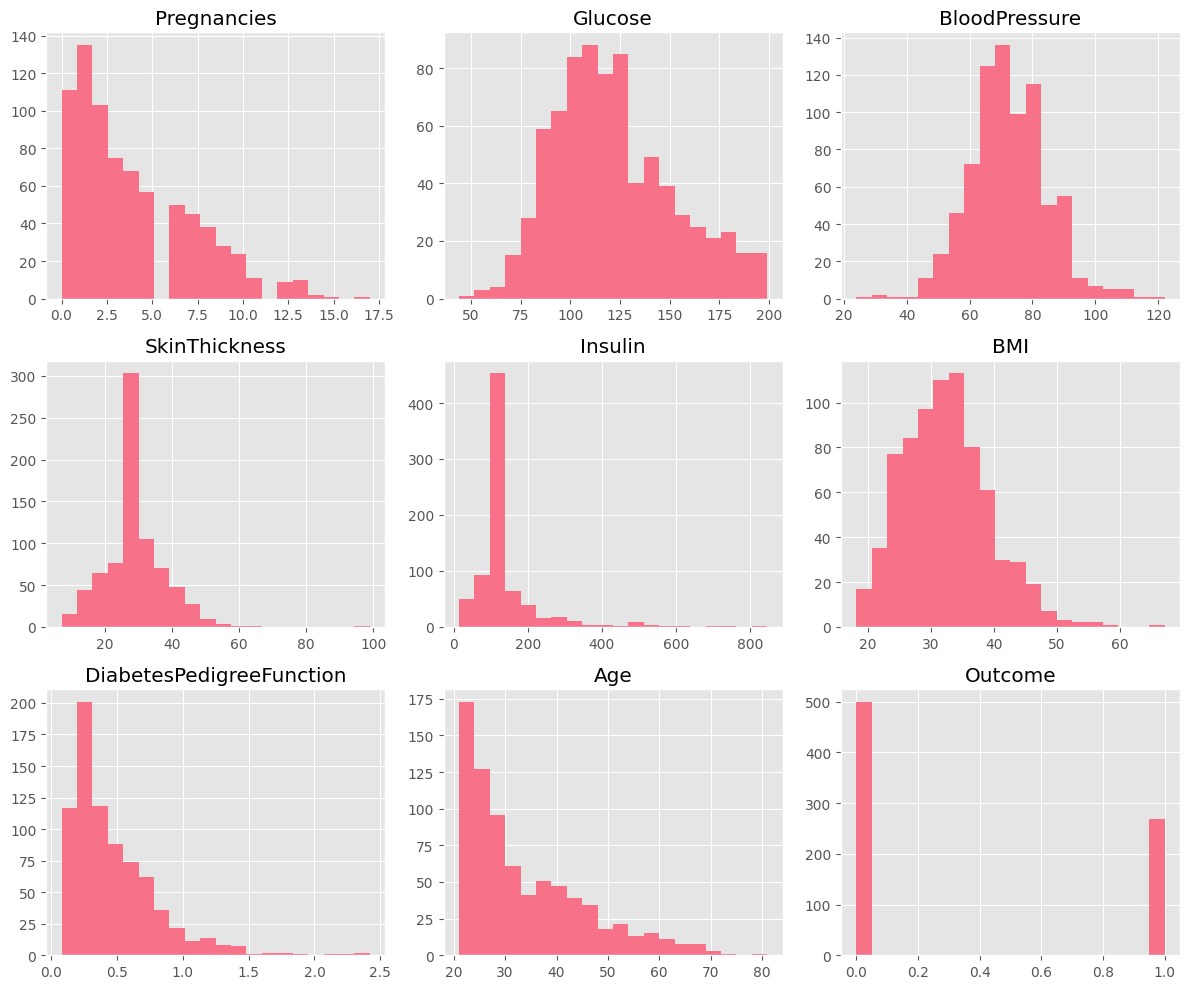

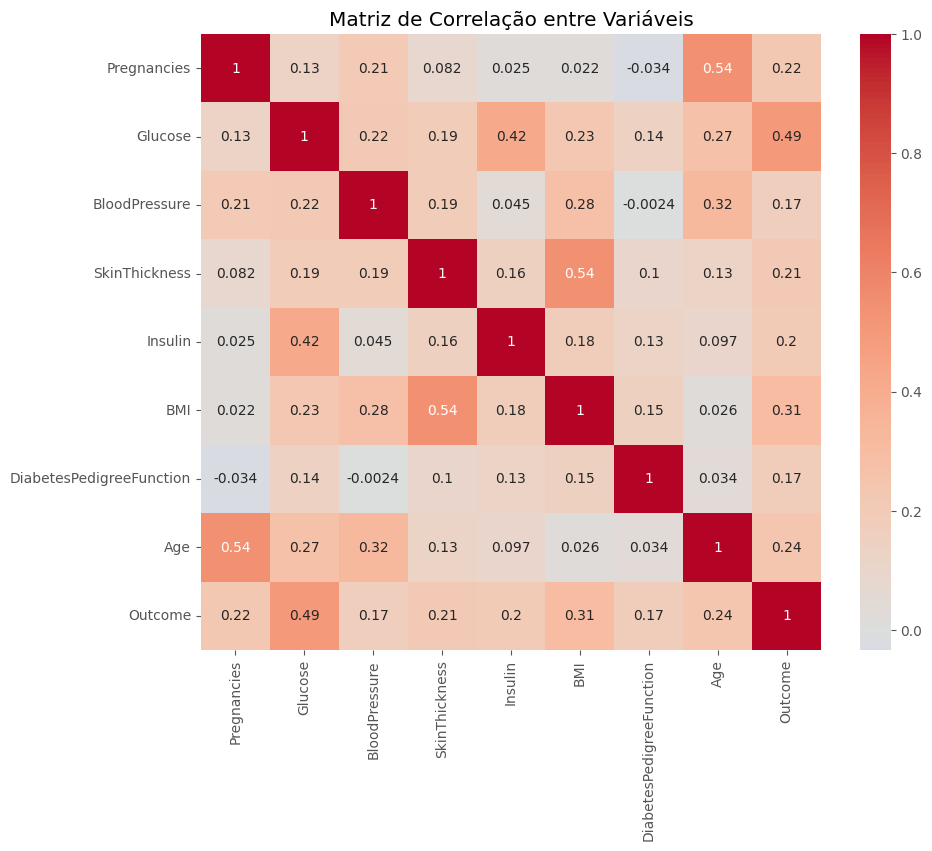

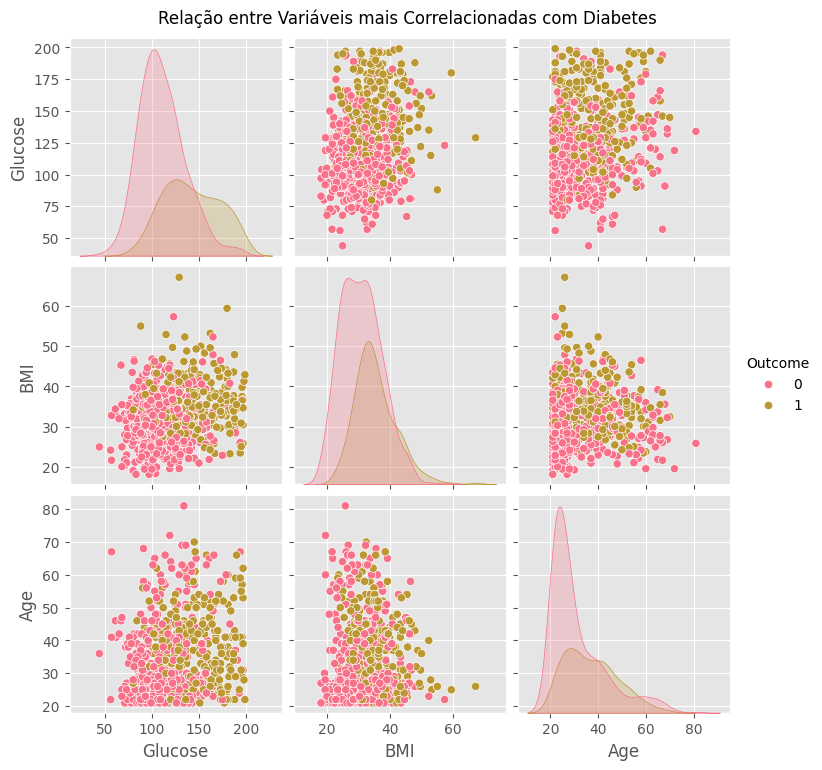


Dimensões dos conjuntos:
- Treino: 614 amostras
- Teste: 154 amostras
- Proporção de positivos no treino: 34.85%
- Proporção de positivos no teste: 35.06%

Treinando Logistic Regression...

Logistic Regression - Melhores parâmetros: {'C': 1, 'penalty': 'l2'}
               precision    recall  f1-score   support

Não Diabético       0.75      0.81      0.78       100
    Diabético       0.59      0.50      0.54        54

     accuracy                           0.70       154
    macro avg       0.67      0.66      0.66       154
 weighted avg       0.69      0.70      0.70       154



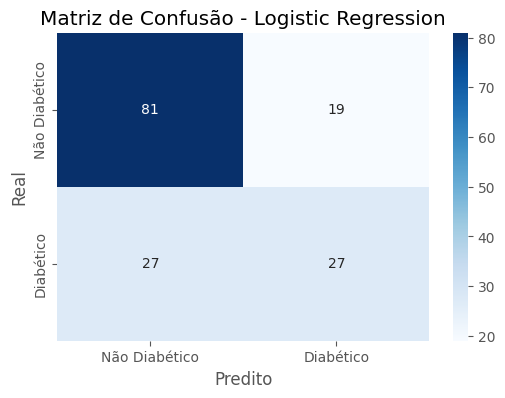


Treinando Random Forest...

Random Forest - Melhores parâmetros: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
               precision    recall  f1-score   support

Não Diabético       0.79      0.84      0.81       100
    Diabético       0.66      0.57      0.61        54

     accuracy                           0.75       154
    macro avg       0.72      0.71      0.71       154
 weighted avg       0.74      0.75      0.74       154



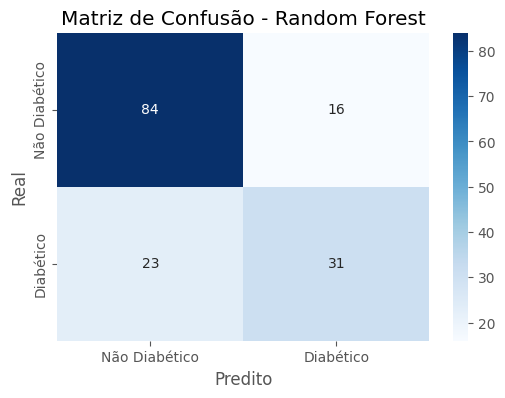


Treinando SVM...

SVM - Melhores parâmetros: {'C': 0.1, 'kernel': 'linear'}
               precision    recall  f1-score   support

Não Diabético       0.75      0.83      0.79       100
    Diabético       0.60      0.48      0.54        54

     accuracy                           0.71       154
    macro avg       0.68      0.66      0.66       154
 weighted avg       0.70      0.71      0.70       154



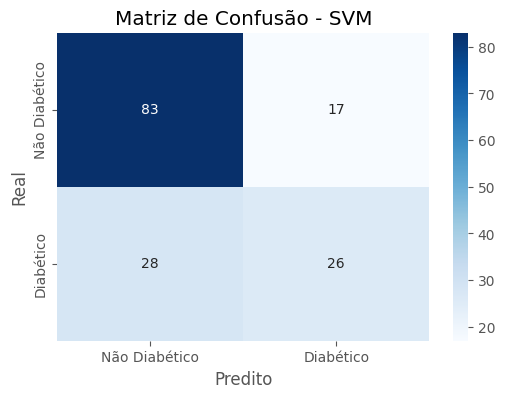


Treinando XGBoost...

XGBoost - Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
               precision    recall  f1-score   support

Não Diabético       0.78      0.85      0.81       100
    Diabético       0.67      0.56      0.61        54

     accuracy                           0.75       154
    macro avg       0.72      0.70      0.71       154
 weighted avg       0.74      0.75      0.74       154



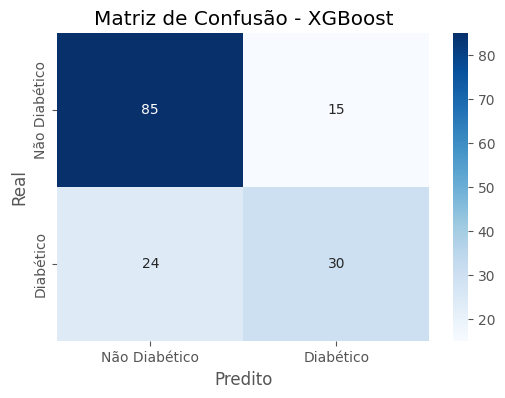


Comparação de Desempenho dos Modelos:


<Figure size 1000x600 with 0 Axes>

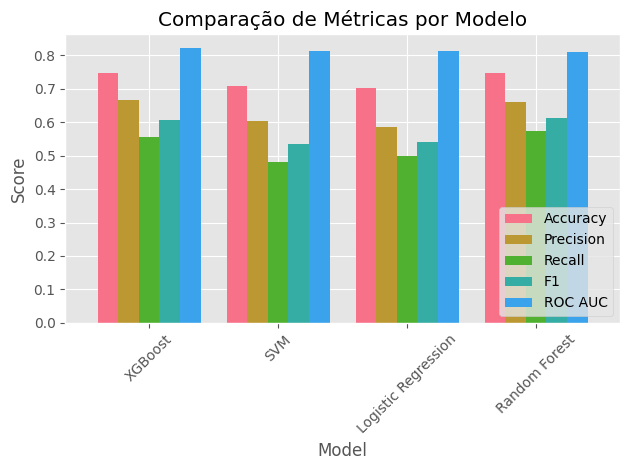

<Figure size 1000x800 with 0 Axes>

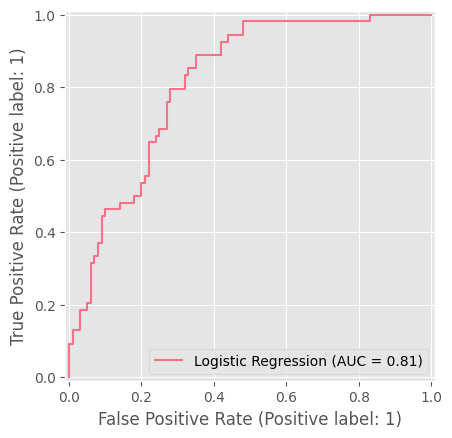

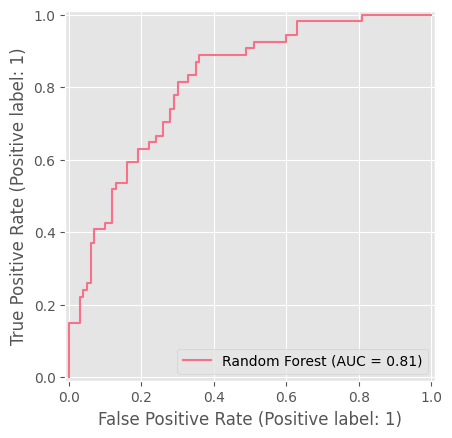

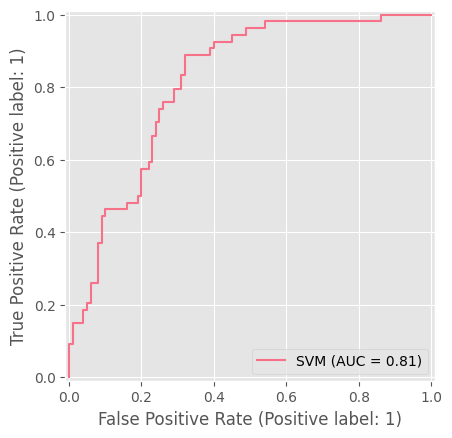

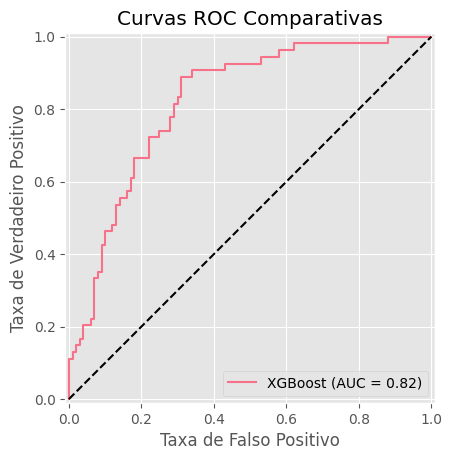

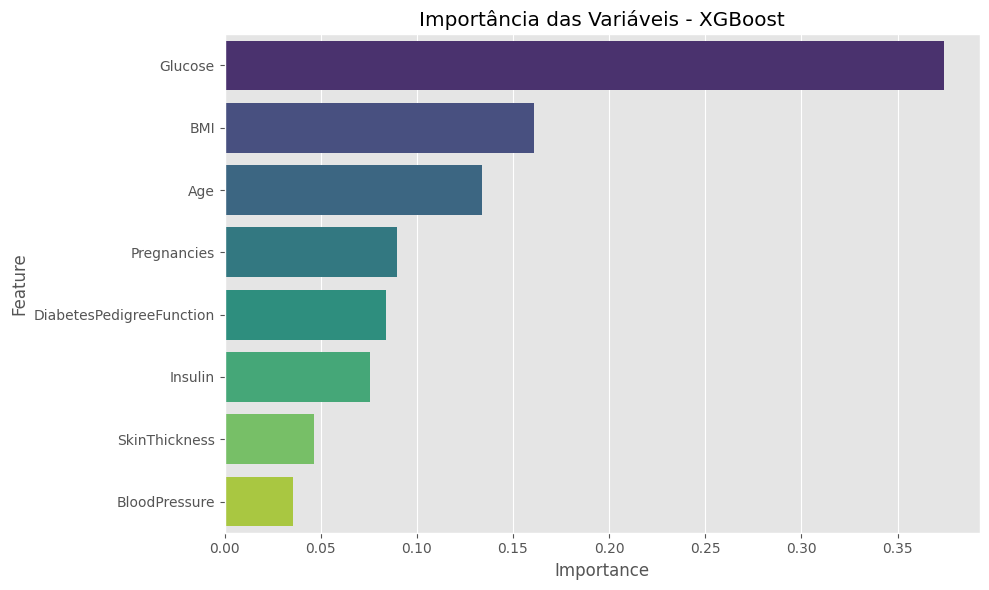


Importância das variáveis:
                    Feature  Importance
1                   Glucose    0.374190
5                       BMI    0.160728
7                       Age    0.133876
0               Pregnancies    0.089951
6  DiabetesPedigreeFunction    0.083905
4                   Insulin    0.075648
3             SkinThickness    0.046285
2             BloodPressure    0.035416

Resultados salvos em 'resultados_modelos.csv'
Melhor modelo (XGBoost) salvo em 'melhor_modelo.pkl'


In [4]:
# %% [markdown]
"""
# Análise de Diabetes com Machine Learning
**Dataset:** Pima Indians Diabetes
**Objetivo:** Prever diabetes com base em atributos clínicos
**Algoritmos:** Regressão Logística, Random Forest, SVM, XGBoost
**Métricas:** Acurácia, Precisão, Recall, F1, AUC-ROC
"""
# %%

# ======================
# 1. IMPORTAÇÕES E CONFIG
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            classification_report, RocCurveDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('ggplot')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

# %% [markdown]
# ======================
# 2. PRÉ-PROCESSAMENTO
# ======================

# Carregar dados
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=cols)

# Análise inicial
print("\nInformações do dataset:")
print(f"- Total de registros: {len(df)}")
print(f"- Proporção de casos positivos: {df['Outcome'].mean():.2%}")
print("\nEstatísticas descritivas:")
print(df.describe().T)

# Tratamento de valores inválidos
# Colunas onde zero não faz sentido fisiológico
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_cols] = df[zero_cols].replace(0, np.nan)

# Preencher valores faltantes com mediana (menos sensível a outliers)
for col in zero_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Visualizar distribuição após tratamento
plt.figure(figsize=(12, 8))
df.hist(bins=20, layout=(3, 3), figsize=(12, 10))
plt.tight_layout()
plt.show()

# %% [markdown]
# ======================
# 3. ANÁLISE EXPLORATÓRIA
# ======================

# Matriz de correlação
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

# Pairplot das variáveis mais correlacionadas
top_features = corr_matrix['Outcome'].abs().sort_values(ascending=False).index[1:4]
sns.pairplot(df, vars=top_features, hue='Outcome', diag_kind='kde')
plt.suptitle('Relação entre Variáveis mais Correlacionadas com Diabetes', y=1.02)
plt.show()

# %% [markdown]
# ======================
# 4. PREPARAÇÃO DOS DADOS
# ======================

# Separar features e target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão treino-teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)

print(f"\nDimensões dos conjuntos:")
print(f"- Treino: {X_train.shape[0]} amostras")
print(f"- Teste: {X_test.shape[0]} amostras")
print(f"- Proporção de positivos no treino: {y_train.mean():.2%}")
print(f"- Proporção de positivos no teste: {y_test.mean():.2%}")

# %% [markdown]
# ======================
# 5. MODELAGEM
# ======================

# Definir modelos e parâmetros para GridSearch
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l2']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.1]
        }
    }
}

# Treinar e avaliar modelos com validação cruzada
results = []
best_models = {}

for name, config in models.items():
    print(f"\nTreinando {name}...")

    # GridSearchCV para otimização de hiperparâmetros
    gs = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1
    )
    gs.fit(X_train, y_train)

    # Melhor modelo
    best_model = gs.best_estimator_
    best_models[name] = best_model

    # Previsões
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    # Métricas
    metrics = {
        'Model': name,
        'Best Params': gs.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba),
        'CV Score (Mean)': gs.best_score_
    }

    results.append(metrics)

    # Relatório de classificação
    print(f"\n{name} - Melhores parâmetros: {gs.best_params_}")
    print(classification_report(y_test, y_pred, target_names=['Não Diabético', 'Diabético']))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Não Diabético', 'Diabético'],
                yticklabels=['Não Diabético', 'Diabético'])
    plt.title(f'Matriz de Confusão - {name}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

# %% [markdown]
# ======================
# 6. COMPARAÇÃO DOS MODELOS
# ======================

# DataFrame com resultados
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
results_df.sort_values(by='ROC AUC', ascending=False, inplace=True)

print("\nComparação de Desempenho dos Modelos:")
print(results_df.drop(columns='Best Params').style
      .background_gradient(cmap='viridis', subset=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC'])
      .format("{:.2%}", subset=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'CV Score (Mean)']))

# Gráfico de comparação
plt.figure(figsize=(10, 6))
metrics_to_plot = results_df.drop(columns=['Best Params', 'CV Score (Mean)'])
metrics_to_plot.plot(kind='bar', width=0.8)
plt.title('Comparação de Métricas por Modelo')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Curvas ROC
plt.figure(figsize=(10, 8))
for name, model in best_models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curvas ROC Comparativas')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend(loc='lower right')
plt.show()

# %% [markdown]
# ======================
# 7. ANÁLISE DE IMPORTÂNCIA DE VARIÁVEIS
# ======================

# Usando o melhor modelo (Random Forest ou XGBoost)
best_model_name = results_df.index[0]
best_model = best_models[best_model_name]

if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': cols[:-1],
        'Importance': best_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
    plt.title(f'Importância das Variáveis - {best_model_name}')
    plt.tight_layout()
    plt.show()

    print("\nImportância das variáveis:")
    print(feature_importance)
else:
    print(f"\nO modelo {best_model_name} não fornece importância de variáveis.")

# %% [markdown]
# ======================
# 8. SALVANDO RESULTADOS
# ======================

# Salvar resultados em CSV
results_df.to_csv('resultados_modelos.csv')
print("\nResultados salvos em 'resultados_modelos.csv'")

# Salvar o melhor modelo
import joblib
joblib.dump(best_model, 'melhor_modelo.pkl')
print(f"Melhor modelo ({best_model_name}) salvo em 'melhor_modelo.pkl'")